# Optimization in Continuous Space

In the tutorials so far, we have been discretizing the feature space to perform Bayesian optimization.
PHYSBO can also optimize while keeping quantities continuous.

As an algorithm for maximizing the acquisition function in continuous space, random search is implemented.
Additionally, you can use [ODAT-SE](https://github.com/issp-center-dev/ODAT-SE) as an optimization library.
This can be installed using `pip`.

```bash
python3 -m pip install odatse
```

## Basic Usage

First, import the necessary modules.

In [1]:
import numpy as np
import physbo
import matplotlib.pyplot as plt

Cythonized version of physbo is used


The function `simulator` to be optimized, unlike the discrete version which received candidate point numbers `action` as input, in the continuous version directly receives coordinates `x` as input.
`x` is an array of size $N\times D$, where $N$ is the number of data points to compute and $D$ is the dimensionality of the features.

In [2]:
def simulator(x):
    return -np.sum(x**2, axis=1)

The lower and upper bounds of the feature space are specified by `min_X` and `max_X` respectively.

In [3]:
min_X = [-2.0, -2.0]
max_X = [2.0, 2.0]

The continuous space version of the `Policy` class is `physbo.search.range.Policy`.
The constructor takes `min_X` and `max_X` as parameters.
Also, similar to the discrete space version, you can enable parallel execution by passing `mpi4py.MPI.Comm` as `comm`.
You can also set the random seed using the `set_seed` method.

In [4]:
seed = 31415
policy = physbo.search.range.Policy(min_X=min_X, max_X=max_X)
policy.set_seed(seed)

Once the `Policy` class is created, you can execute optimization following the same flow as the discrete space version.
First, to create initial training data for learning the surrogate model, execute `random_search`.

In [5]:
policy.random_search(max_num_probes=10, simulator=simulator)

0001-th step: f(x) = -0.831185 (action=[0.58327442 0.70069668])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0002-th step: f(x) = -5.914186 (action=[1.88281594 1.53921746])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0003-th step: f(x) = -4.352756 (action=[1.63626337 1.29437187])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0004-th step: f(x) = -0.237057 (action=[-0.05316112  0.48397432])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0005-th step: f(x) = -0.488353 (action=[ 0.57404985 -0.39852174])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0006-th step: f(x) = -2.441356 (action=[1.50087645 0.43442582])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0007-th step: f(x) = -3.440784 (action=[-1.57320004 -0.98276443])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0008-th step: f(x) = -3.452

Next, execute Bayesian optimization with `bayes_search`.

In [6]:
res = policy.bayes_search(max_num_probes=10, simulator=simulator, score="EI")

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 14.586042968393606
50 -th epoch marginal likelihood 14.234874815492592
100 -th epoch marginal likelihood 14.063504009485214
150 -th epoch marginal likelihood 13.916750623078872
200 -th epoch marginal likelihood 13.772691286779512
250 -th epoch marginal likelihood 13.633003306706115
300 -th epoch marginal likelihood 13.49920085405347
350 -th epoch marginal likelihood 13.371932369305052
400 -th epoch marginal likelihood 13.251396114620242
450 -th epoch marginal likelihood 13.13755169992651
500 -th epoch marginal likelihood 13.03022856247339
Done

0011-th step: f(x) = -5.026362 (action=[-1.03592362  1.98827161])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0012-th step: f(x) = -0.028634 (action=[0.1327553  0.10492853])
   current best f(x) = -0.028634 (best action=[0.1327553  0.10492853]) 

0013-th step: f(x) = -0.013414 (action=[0.0703

The return value `res` of the `bayes_search` function contains the process of Bayesian optimization.
Using the `export_sequence_best_fx` method, you can obtain the optimization results at each step.

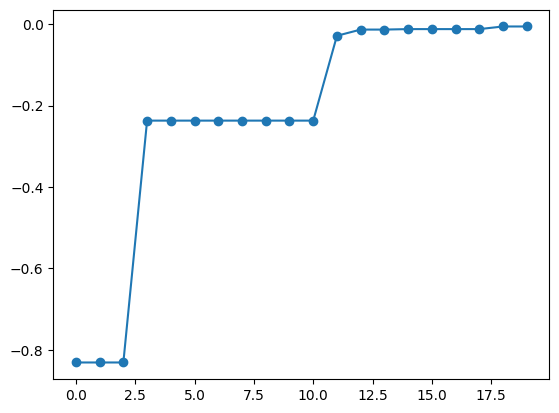

In [7]:
best_fx, best_X = res.export_sequence_best_fx()

plt.plot(best_fx, "o-")

## Acquisition Function Optimization Algorithm

For acquisition function optimization, random search is performed by default.
This means that `nsamples = 1000` candidate points are randomly selected, and the point with the largest acquisition function among them is chosen.
To change the value of `nsamples`, use `physbo.search.optimizer.random.Optimizer`.
For example, if you want to set `nsamples = 100`, create `random_optimizer` as follows and pass it to the `optimizer` keyword of the `bayes_search` function.

0001-th step: f(x) = -0.831185 (action=[0.58327442 0.70069668])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0002-th step: f(x) = -5.914186 (action=[1.88281594 1.53921746])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0003-th step: f(x) = -4.352756 (action=[1.63626337 1.29437187])
   current best f(x) = -0.831185 (best action=[0.58327442 0.70069668]) 

0004-th step: f(x) = -0.237057 (action=[-0.05316112  0.48397432])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0005-th step: f(x) = -0.488353 (action=[ 0.57404985 -0.39852174])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0006-th step: f(x) = -2.441356 (action=[1.50087645 0.43442582])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0007-th step: f(x) = -3.440784 (action=[-1.57320004 -0.98276443])
   current best f(x) = -0.237057 (best action=[-0.05316112  0.48397432]) 

0008-th step: f(x) = -3.452

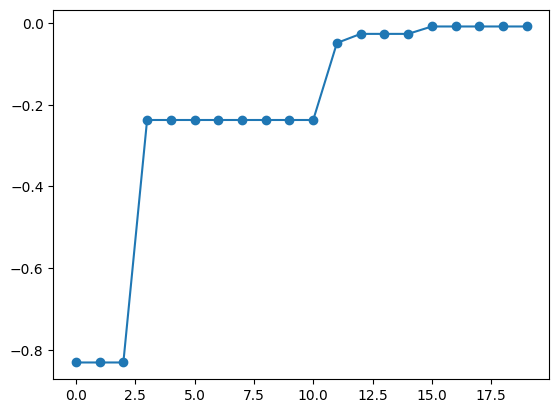

In [8]:
random_optimizer = physbo.search.optimize.random.Optimizer(min_X=min_X, max_X=max_X, nsamples=100)

policy = physbo.search.range.Policy(min_X=min_X, max_X=max_X)
policy.set_seed(seed)
policy.random_search(max_num_probes=10, simulator=simulator)

res = policy.bayes_search(max_num_probes=10, simulator=simulator, score="EI", optimizer=random_optimizer)

best_fx, best_X = res.export_sequence_best_fx()

plt.plot(best_fx, "o-")

Using optimizers other than `physbo.search.optimizer.random.Optimizer`, you can utilize maximization algorithms other than random search.
PHYSBO provides an optimizer using ODAT-SE: `physbo.search.optimize.odatse.Optimizer`.
This library can solve optimization problems using five algorithms:

- "exchange": Replica exchange Monte Carlo method
- "pamc": Population annealing Monte Carlo method
- "minsearch": Nelder-Mead method
- "mapper": Grid search
- "bayes": Bayesian optimization

The algorithms and hyperparameters of ODAT-SE are specified using a dictionary equivalent to the `[algorithm]` section of the [ODAT-SE input file](https://issp-center-dev.github.io/ODAT-SE/manual/main/en/input.html#algorithm).

The `physbo.search.optimize.odatse.default_alg_dict` function creates a template for this dictionary, so modify the parameters as needed.

In [9]:
import physbo.search.optimize.odatse
odatse_alg_dict = physbo.search.optimize.odatse.default_alg_dict(min_X=min_X, max_X=max_X, algorithm_name="exchange")

# show the default parameters for the exchange algorithm
odatse_alg_dict

{'name': 'exchange',
 'seed': 12345,
 'param': {'min_list': array([-2., -2.]),
  'max_list': array([2., 2.]),
  'step_list': array([0.04, 0.04])},
 'exchange': {'numsteps': 1000,
  'numsteps_exchange': 10,
  'Tmin': 0.1,
  'Tmax': 10.0,
  'Tlogspace': True,
  'nreplica_per_proc': 10}}

Pass `odatse_alg_dict` to `physbo.search.optimize.odatse.Optimizer` to create the optimizer `odatse_optimizer`.
By passing this to the `optimizer` keyword of the `bayes_search` function, similar to `random_optimizer`, you can perform optimization using ODAT-SE.

In [ ]:
odatse_optimizer = physbo.search.optimize.odatse.Optimizer(alg_dict=odatse_alg_dict)

policy = physbo.search.range.Policy(min_X=min_X, max_X=max_X)
policy.set_seed(seed)
policy.random_search(max_num_probes=10, simulator=simulator)

res = policy.bayes_search(max_num_probes=10, simulator=simulator, optimizer=odatse_optimizer, score="EI")

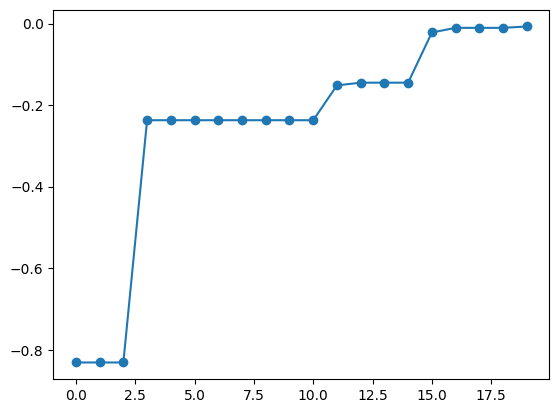

In [11]:
best_fx, best_X = res.export_sequence_best_fx()

plt.plot(best_fx, "o-")